In [5]:
import sys
sys.path.append("/home/kelechi.mbibi/Final_Project")  

import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from Dog_Breed import ImageOnlyClassifier, train_dataset, test_dataset, test_loader  # Import model

In [4]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model with the same structure as trained
num_classes = 70  
model = ImageOnlyClassifier(num_classes=num_classes).to(device)

# Load best model weights
model.load_state_dict(torch.load("/home/kelechi.mbibi/Final_Project/Best_DogBreed_Model.pth", map_location=device))
model.eval()  # Set model to evaluation mode

print("Model loaded successfully!")


Model loaded successfully!


In [6]:
# Define loss function for evaluation
criterion = torch.nn.CrossEntropyLoss()

# Correct Evaluation Function
def evaluate(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(test_loader), accuracy

#Run Evaluation
test_loss, test_acc = evaluate(model, test_loader, criterion, device)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}")

Test Loss: 0.2232
Test Accuracy: 0.95


In [8]:
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Top 3 Most Confused Class Pairs:
Boston Terrier → Bulldog : 3 times
Malinois → German Sheperd : 3 times
American Spaniel → Irish Spaniel : 2 times


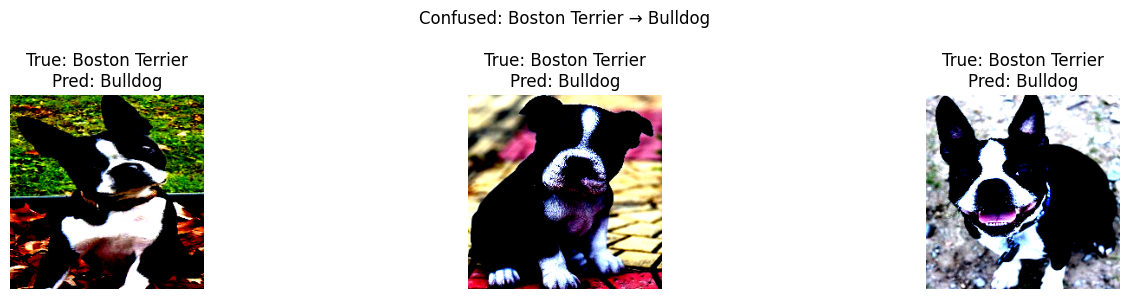

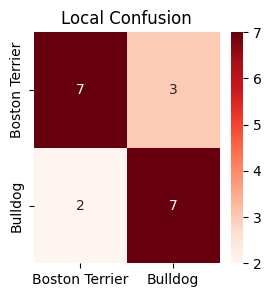

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


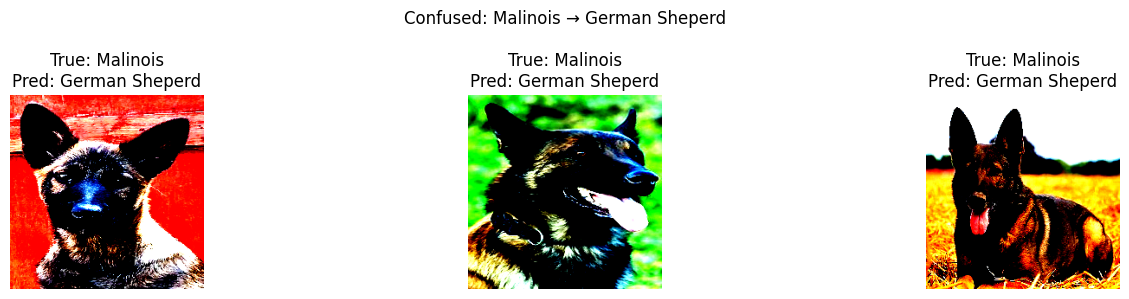

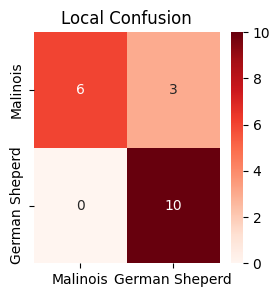

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


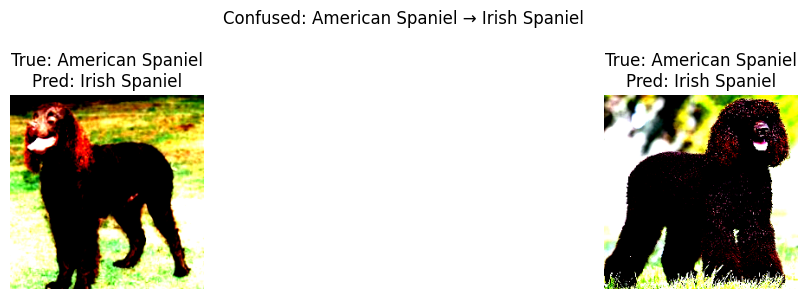

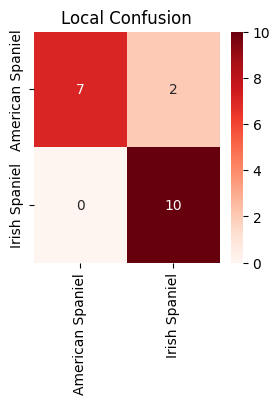

In [9]:
cm = confusion_matrix(all_labels, all_preds)

misclass = cm.copy()
np.fill_diagonal(misclass, 0)

confused_pairs = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and misclass[i, j] > 0:
            confused_pairs.append(((i, j), misclass[i, j]))

confused_pairs = sorted(confused_pairs, key=lambda x: x[1], reverse=True)[:3]

print("Top 3 Most Confused Class Pairs:")
for (i, j), count in confused_pairs:
    print(f"{train_dataset.classes[i]} → {train_dataset.classes[j]} : {count} times")

for (i, j), _ in confused_pairs:
    wrong_idx = np.where((all_labels == i) & (all_preds == j))[0]
    if len(wrong_idx) > 0:
        fig, axs = plt.subplots(1, min(5, len(wrong_idx)), figsize=(15, 3))
        axs = axs if isinstance(axs, np.ndarray) else [axs]

        for ax, idx in zip(axs, wrong_idx[:5]):
            img, _ = test_dataset[idx]
            ax.imshow(img.permute(1, 2, 0).numpy())
            ax.axis('off')
            ax.set_title(f"True: {train_dataset.classes[i]}\nPred: {train_dataset.classes[j]}")

        plt.suptitle(f"Confused: {train_dataset.classes[i]} → {train_dataset.classes[j]}")
        plt.tight_layout()
        plt.show()

        # Heatmap for the local confusion
        sub_cm = np.array([[cm[i, i], cm[i, j]],
                           [cm[j, i], cm[j, j]]])

        plt.figure(figsize=(3, 3))
        sns.heatmap(sub_cm, annot=True, fmt="d", cmap="Reds", xticklabels=[train_dataset.classes[i], train_dataset.classes[j]], yticklabels=[train_dataset.classes[i], train_dataset.classes[j]])
        plt.title("Local Confusion")
        plt.show()

In [19]:
class_wise_accuracy = np.diag(cm) / cm.sum(1)
worst_classes_idx = np.argsort(class_wise_accuracy)[:5]

print("\nTop 5 Worst Performing Classes:")
for idx in worst_classes_idx:
    print(f"{train_dataset.classes[idx]} - Accuracy: {class_wise_accuracy[idx]:.2f}")


Top 5 Worst Performing Classes:
Cockapoo - Accuracy: 0.60
Malinois - Accuracy: 0.60
Boston Terrier - Accuracy: 0.70
American Spaniel - Accuracy: 0.70
Bulldog - Accuracy: 0.70


In [16]:
correct_counts = np.diag(cm)
sorted_indices = np.argsort(-correct_counts)[:5]
print("\nTop 5 Best Classified Classes:")
for i in sorted_indices:
    print(f"{train_dataset.classes[i]} with {correct_counts[i]} correct predictions")


Top 5 Best Classified Classes:
Afghan with 10 correct predictions
Coyote with 10 correct predictions
Dalmation with 10 correct predictions
Dhole with 10 correct predictions
Vizsla with 10 correct predictions


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

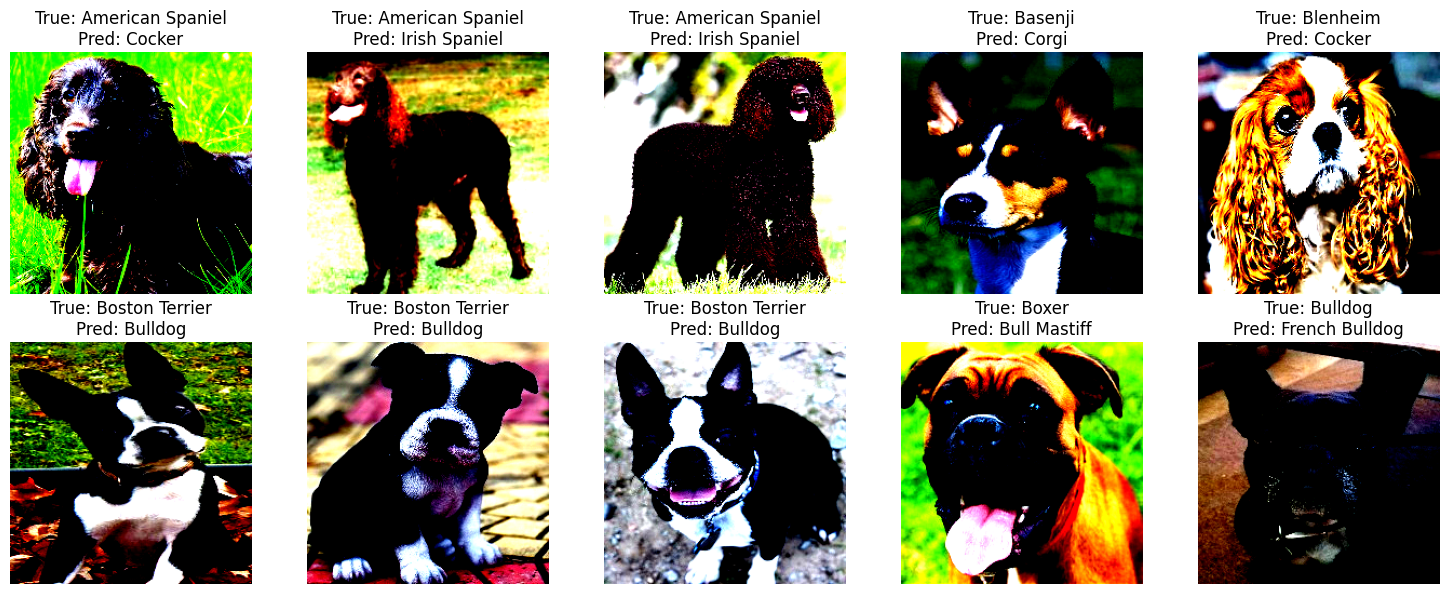

In [13]:
wrong_idx = np.where(all_preds != all_labels)[0]
if len(wrong_idx) > 0:
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    axs = axs.flatten()

    for ax, idx in zip(axs, wrong_idx[:10]):
        img, label = test_dataset[idx]
        ax.imshow(img.permute(1, 2, 0).numpy())
        ax.axis('off')
        ax.set_title(f"True: {train_dataset.classes[all_labels[idx]]}\nPred: {train_dataset.classes[all_preds[idx]]}")

    plt.tight_layout()
    plt.show()
else:
    print("No misclassifications found!")

In [17]:
report = classification_report(all_labels, all_preds, target_names=train_dataset.classes)
print("\nClass-wise Precision, Recall, and F1 Score:\n")
print(report)


Class-wise Precision, Recall, and F1 Score:

                   precision    recall  f1-score   support

           Afghan       1.00      1.00      1.00        10
 African Wild Dog       1.00      1.00      1.00        10
         Airedale       1.00      1.00      1.00        10
American Hairless       1.00      1.00      1.00        10
 American Spaniel       1.00      0.70      0.82        10
          Basenji       1.00      0.90      0.95        10
           Basset       1.00      1.00      1.00        10
           Beagle       1.00      1.00      1.00        10
   Bearded Collie       1.00      1.00      1.00        10
         Bermaise       1.00      1.00      1.00        10
     Bichon Frise       1.00      1.00      1.00        10
         Blenheim       1.00      0.90      0.95        10
       Bloodhound       1.00      1.00      1.00        10
         Bluetick       1.00      1.00      1.00        10
    Border Collie       1.00      1.00      1.00        10
         